# import libraries

In [6]:
import tensorflow
import numpy as np
import cv2,math
import matplotlib.pyplot as plt
import os

# tensorflow version check

In [7]:
if tensorflow.__version__.startswith('1.'):
    import tensorflow as tf
    from tensorflow.python.platform import gfile
else:
    import tensorflow.compat.v1 as tf
    tf.disable_v2_behavior()
    import tensorflow.compat.v1.gfile as gfile

print("Tensorflow version: ",tf.__version__)

Tensorflow version:  2.5.0


In [8]:
'''
My version setting 1:
tensorflow:1.13.1
numpy: 1.16.5
cv2: 4.2.0

My version setting 2:
tensorflow:2.1
numpy: 1.19.2
cv2: 3.4.3

My version setting 3:
tensorflow:2.5
numpy: 1.19.5
cv2: 4.5.2
'''
print(tensorflow.__version__)
print(np.__version__)
print(cv2.__version__)

2.5.0
1.19.5
4.5.2


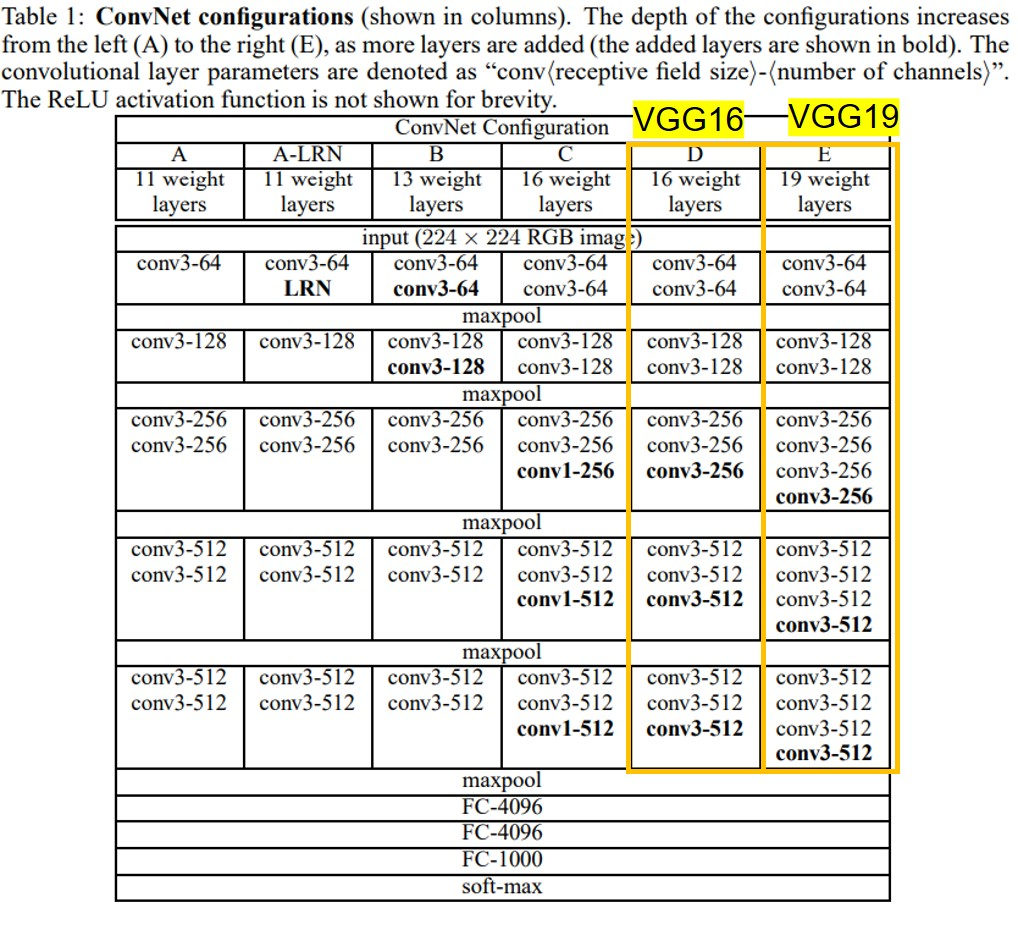

# tf.placeholder() definitions

In [9]:
model_shape = [None,32,32,3]
tf_input = tf.placeholder(shape=model_shape,dtype=tf.float32,name='input')
tf_keep_prob = tf.placeholder(tf.float32,name="keep_prob")
tf_keep_prob_2 = tf.placeholder(tf.float32,name="keep_prob_2")
tf_label_batch = tf.placeholder(shape=[None],dtype=tf.int32,name="label_batch")

tf_model_shape = [None,tf_input.shape[1].value,tf_input.shape[2].value,tf_input.shape[3].value]
print("model shape:", tf_model_shape)

model shape: [None, 32, 32, 3]


# Model inference

In [10]:
kernel_size = [3,3]


net = tf.layers.conv2d(
            inputs=tf_input,
            filters = 8,
            kernel_size=kernel_size,
            kernel_regularizer=tf.keras.regularizers.l2(0.1),
            padding="same",
            activation=tf.nn.relu
        )
# net = tf.layers.conv2d(
#             inputs=net,
#             filters = 64,
#             kernel_size=kernel_size,
#             kernel_regularizer=tf.keras.regularizers.l2(0.1),
#             padding="same",
#             activation=tf.nn.relu
#         )
net = tf.layers.max_pooling2d(net,pool_size=[2,2],strides=2,padding='SAME')
print("pool_1 shape: ",net.shape)

net = tf.layers.conv2d(
            inputs=net,
            filters = 16,
            kernel_size=kernel_size,
            kernel_regularizer=tf.keras.regularizers.l2(0.1),
            padding="same",
            activation=tf.nn.relu
        )
# net = tf.layers.conv2d(
#             inputs=net,
#             filters = 128,
#             kernel_size=kernel_size,
#             kernel_regularizer=tf.keras.regularizers.l2(0.1),
#             padding="same",
#             activation=tf.nn.relu
#         )
net = tf.layers.max_pooling2d(net,pool_size=[2,2],strides=2,padding='SAME')
print("pool_2 shape: ",net.shape)

net = tf.layers.conv2d(
            inputs=net,
            filters = 32,
            kernel_size=kernel_size,
            kernel_regularizer=tf.keras.regularizers.l2(0.1),
            padding="same",
            activation=tf.nn.relu
        )
# net = tf.layers.conv2d(
#             inputs=net,
#             filters = 256,
#             kernel_size=kernel_size,
#             kernel_regularizer=tf.keras.regularizers.l2(0.1),
#             padding="same",
#             activation=tf.nn.relu
#         )
# net = tf.layers.conv2d(
#             inputs=net,
#             filters = 256,
#             kernel_size=kernel_size,
#             kernel_regularizer=tf.keras.regularizers.l2(0.1),
#             padding="same",
#             activation=tf.nn.relu
#         )
net = tf.layers.max_pooling2d(net,pool_size=[2,2],strides=2,padding='SAME')
print("pool_3 shape: ",net.shape)

net = tf.layers.conv2d(
            inputs=net,
            filters = 64,
            kernel_size=kernel_size,
            kernel_regularizer=tf.keras.regularizers.l2(0.1),
            padding="same",
            activation=tf.nn.relu
        )
# net = tf.layers.conv2d(
#             inputs=net,
#             filters = 512,
#             kernel_size=kernel_size,
#             kernel_regularizer=tf.keras.regularizers.l2(0.1),
#             padding="same",
#             activation=tf.nn.relu
#         )
# net = tf.layers.conv2d(
#             inputs=net,
#             filters = 512,
#             kernel_size=kernel_size,
#             kernel_regularizer=tf.keras.regularizers.l2(0.1),
#             padding="same",
#             activation=tf.nn.relu
#         )
net = tf.layers.max_pooling2d(net,pool_size=[2,2],strides=2,padding='SAME')
print("pool_4 shape: ",net.shape)

# net = tf.layers.conv2d(
#             inputs=net,
#             filters = 512,
#             kernel_size=kernel_size,
#             kernel_regularizer=tf.keras.regularizers.l2(0.1),
#             padding="same",
#             activation=tf.nn.relu
#         )
# net = tf.layers.conv2d(
#             inputs=net,
#             filters = 512,
#             kernel_size=kernel_size,
#             kernel_regularizer=tf.keras.regularizers.l2(0.1),
#             padding="same",
#             activation=tf.nn.relu
#         )
# net = tf.layers.conv2d(
#             inputs=net,
#             filters = 512,
#             kernel_size=kernel_size,
#             kernel_regularizer=tf.keras.regularizers.l2(0.1),
#             padding="same",
#             activation=tf.nn.relu
#         )
# net = tf.layers.max_pooling2d(net,pool_size=[2,2],strides=2,padding='SAME')
# print("pool_5 shape: ",net.shape)

#----flatten
net = tf.layers.flatten(net)

#----FC-4096
net = tf.nn.dropout(net,keep_prob=tf_keep_prob)
net = tf.layers.dense(inputs=net, units=128, activation=tf.nn.relu)
print("FC_1 shape:",net.shape)

#----FC-4096
# net = tf.nn.dropout(net,keep_prob=tf_keep_prob_2)
# net = tf.layers.dense(inputs=net, units=4096, activation=tf.nn.relu)
# print("FC_2 shape:",net.shape)

#----FC-1000
output = tf.layers.dense(inputs=net,units= 10,activation=None)
print("output shape: ",output.shape)

prediction = tf.nn.softmax(output,name="prediction")

pool_1 shape:  (?, 16, 16, 8)
pool_2 shape:  (?, 8, 8, 16)
pool_3 shape:  (?, 4, 4, 32)
pool_4 shape:  (?, 2, 2, 64)
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
FC_1 shape: (?, 128)
output shape:  (?, 10)


C:\Users\User\Anaconda3\envs\tf_2.5\lib\site-packages\tensorflow\python\keras\legacy_tf_layers\convolutional.py:414: UserWarning: `tf.layers.conv2d` is deprecated and will be removed in a future version. Please Use `tf.keras.layers.Conv2D` instead.
  warnings.warn('`tf.layers.conv2d` is deprecated and '
C:\Users\User\Anaconda3\envs\tf_2.5\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1692: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
C:\Users\User\Anaconda3\envs\tf_2.5\lib\site-packages\tensorflow\python\keras\legacy_tf_layers\pooling.py:310: UserWarning: `tf.layers.max_pooling2d` is deprecated and will be removed in a future version. Please use `tf.keras.layers.MaxPooling2D` instead.
  warnings.warn('`tf.layers.max_pooling2d` is deprecated and '
C:\Users\User\Anaconda3\envs\tf_2.5\lib\site-packages\tensorflow\python\keras\legacy_tf_lay

# Set the loss and optimizer

In [11]:
learning_rate = 1e-4

loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels=tf_label_batch,logits=output),
                                  name="loss")
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)

# Read image paths and record classes from the train folder

In [12]:

root_dir = r"D:\dataset\fashion_mnist\train"

#----var
img_format = {'png', 'jpg', 'bmp'}
paths_train = list()
class2label = dict()
count = 0
labels_train = list()


for dirname, sub_dirname, filenames in os.walk(root_dir):
    if len(filenames) > 0:
        for filename in filenames:
            if filename.split(".")[-1] in img_format:
                full_path = os.path.join(dirname, filename)
                paths_train.append(full_path)
                
                #----collect classes
                classname = dirname.split("\\")[-1]
                if classname not in class2label.keys():
                    class2label[classname] = count
                    count += 1
                    
                #----read labels
                labels_train.append(class2label[classname])
                
paths_train = np.array(paths_train)
labels_train = np.array(labels_train)    

print("paths_train shape: ",paths_train.shape)
print("labels_train shape: ",labels_train.shape)  
                


paths_train shape:  (60000,)
labels_train shape:  (60000,)


# Show the classname to label 

In [13]:
print(class2label)

{'Ankle_boot': 0, 'Bag': 1, 'Coat': 2, 'Dress': 3, 'Pullover': 4, 'Sandal': 5, 'Shirt': 6, 'Sneaker': 7, 'T-shirt_top': 8, 'Trouser': 9}


# Random image check of training set

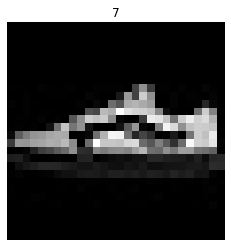

In [14]:
rdm_num = np.random.randint(0,paths_train.shape[0])

img = cv2.imread(paths_train[rdm_num])

plt.imshow(img)
plt.axis('off')
plt.title(labels_train[rdm_num])
plt.show()

# Read image paths and labels from the validation folder

In [15]:
root_dir = r"D:\dataset\fashion_mnist\val"

#----var
# img_format = {'png', 'jpg', 'bmp'}
paths_val = list()
# class2label = dict()
count = 0
labels_val = list()


for dirname, sub_dirname, filenames in os.walk(root_dir):
    if len(filenames) > 0:
        for filename in filenames:
            if filename.split(".")[-1] in img_format:
                full_path = os.path.join(dirname, filename)
                paths_val.append(full_path)
                
                #----collect classes
                classname = dirname.split("\\")[-1]
#                 if classname not in class2label.keys():
#                     class2label[classname] = count
#                     count += 1
                    
                #----read labels
                labels_val.append(class2label[classname])
                
paths_val = np.array(paths_val)
labels_val = np.array(labels_val)    

print("paths_val shape: ",paths_val.shape)
print("labels_val shape: ",labels_val.shape)  

paths_val shape:  (10000,)
labels_val shape:  (10000,)


# Random image check of validation set

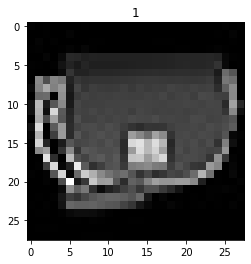

In [16]:
rdm_num = np.random.randint(0,len(paths_val))

img = cv2.imread(paths_val[rdm_num])
plt.imshow(img)
plt.title(labels_val[rdm_num])
plt.show()


# Accuracy calculation function

In [17]:
def evaluation(predictions,labels):
    count = 0
    for i in range(predictions.shape[0]):
        if np.argmax(predictions[i]) == labels[i]:
            count += 1

    return count

# Create the folder to save model weights(CKPT, PB)

In [18]:
save_dir = r"D:\code\model_saver\fashion_mnist"

if not os.path.exists(save_dir):
    os.makedirs(save_dir)

out_dir_prefix = os.path.join(save_dir,"model")
saver = tf.train.Saver(max_to_keep=2)#The number of CKPT files in save_dir 

#----appoint PB node names that will be saved after training
pb_save_path = os.path.join(save_dir,"pb_model.pb")
pb_save_list = ['prediction']

# Model training

In [19]:
#----var 
batch_size = 128
epochs = 50
img_quantity_train = paths_train.shape[0]
img_quantity_val = paths_val.shape[0]
GPU_ratio = None




#----calculate iterations
ites = math.ceil(img_quantity_train / batch_size)
print("img_quantity_train:",img_quantity_train)
print("ites: ",ites)

ites_val = math.ceil(img_quantity_val / batch_size)
print("img_quantity_val:",img_quantity_val)
print("ites: ",ites_val)

#----GPU setting
config = tf.ConfigProto(log_device_placement=True,
                        allow_soft_placement=True)
if GPU_ratio is None:
    config.gpu_options.allow_growth = True
else:
    config.gpu_options.per_process_gpu_memory_fraction = GPU_ratio
    
with tf.Session(config=config) as sess:   
    latest_weights_path = tf.train.latest_checkpoint(save_dir)
    print(latest_weights_path)
    
    if latest_weights_path is not None:
        saver.restore(sess,latest_weights_path)
        print("use previous model param:{}".format(latest_weights_path))
    else:
        sess.run(tf.global_variables_initializer())
        print("no previous model param can be used!")
           
    for epoch in range(epochs):
        train_loss = 0
        train_loss_2 = 0
        train_accuracy = 0
        
        val_loss = 0
        val_loss_2 = 0
        val_accuracy = 0
        
        
        #-----shuffle
        indice = np.random.permutation(img_quantity_train)
        paths_train = paths_train[indice]
        labels_train = labels_train[indice]
        
        #----optimize the weights
        for idx in range(ites):
            num_start = idx * batch_size
            num_end = num_start + batch_size
            if num_end > img_quantity_train:
                num_end = img_quantity_train
                
            batch_dim = [num_end - num_start]
            batch_dim.extend(model_shape[1:])
            batch_data = np.zeros(batch_dim,dtype=np.float32)
            
            
            for i,path in enumerate(paths_train[num_start:num_end]):
                img = cv2.imread(path)
                if img is None:
                    print("read failed:",path)
                else:
                    img = cv2.resize(img,(model_shape[2],model_shape[1]))
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                    batch_data[i] = img
                    
            batch_data /= 255#normalization
            batch_labels = labels_train[num_start:num_end]
            
            sess.run(optimizer,feed_dict={tf_input:batch_data,
                                          tf_label_batch:batch_labels,
                                          tf_keep_prob:0.5,
                                          tf_keep_prob_2:0.75})
            
        #print("finish one epoch")
        
        #----calculate the loss and accuracy of TRAINING set
        for idx in range(ites):
            num_start = idx * batch_size
            num_end = np.minimum(num_start + batch_size,img_quantity_train)

            batch_dim = [num_end - num_start]
            batch_dim.extend(model_shape[1:])
            batch_data = np.zeros(batch_dim,dtype=np.float32)

            for i,path in enumerate(paths_train[num_start:num_end]):
                img = cv2.imread(path)
                if img is None:
                    print("read failed:",path)
                else:
                    img = cv2.resize(img,(model_shape[2],model_shape[1]))
                    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                    batch_data[i] = img

            batch_data /= 255
            batch_labels = labels_train[num_start:num_end]
            
            #----batch data loss and accuracy
            loss_temp, prediction_temp = sess.run([loss,prediction],feed_dict={tf_input:batch_data,
                                          tf_label_batch:batch_labels,
                                          tf_keep_prob:1.0,
                                          tf_keep_prob_2:1.0})
            train_loss += loss_temp
            train_loss_2 += loss_temp * (num_end - num_start)
            train_accuracy += evaluation(prediction_temp,batch_labels)
            
        train_loss /= ites
        train_loss_2 /= img_quantity_train
        
        train_accuracy /= img_quantity_train
        print("Epoch: ",epoch)
        print("train_loss: ",train_loss)
        print("train_loss_2: ",train_loss_2)
        print("train_accuracy: ",train_accuracy)
        
        #----calculate the loss and accuracy of VALIDATION set
        for idx in range(ites_val):
            num_start = idx * batch_size
            num_end = np.minimum(num_start + batch_size,img_quantity_val)

            batch_dim = [num_end - num_start]
            batch_dim.extend(model_shape[1:])
            batch_data = np.zeros(batch_dim,dtype=np.float32)

            for i,path in enumerate(paths_val[num_start:num_end]):
                img = cv2.imread(path)
                if img is None:
                    print("read failed:",path)
                else:
                    img = cv2.resize(img,(model_shape[2],model_shape[1]))
                    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                    batch_data[i] = img

            batch_data /= 255
            batch_labels = labels_val[num_start:num_end]
            
            #----batch data loss and accuracy
            loss_temp, prediction_temp = sess.run([loss,prediction],feed_dict={tf_input:batch_data,
                                          tf_label_batch:batch_labels,
                                          tf_keep_prob:1.0,
                                          tf_keep_prob_2:1.0})
            val_loss += loss_temp
            val_loss_2 += loss_temp * (num_end - num_start)
            val_accuracy += evaluation(prediction_temp,batch_labels)
            
        val_loss /= ites_val
        val_loss_2 /= img_quantity_val
        
        val_accuracy /= img_quantity_val
        print("val_loss: ",val_loss)
        print("val_loss_2: ",val_loss_2)
        print("val_accuracy: ",val_accuracy)
        
        #----save CKPT weights
        model_save_path = saver.save(sess,out_dir_prefix,global_step=epoch)
        print("save model CKPT to ",model_save_path)
        
        #----save PB files
        graph = tf.get_default_graph().as_graph_def()
        output_graph_def = tf.graph_util.convert_variables_to_constants(sess,graph,pb_save_list)
        with tf.gfile.GFile(pb_save_path,'wb')as f:
            f.write(output_graph_def.SerializeToString())
        print("save PB file to ",pb_save_path)
            
    

img_quantity_train: 60000
ites:  469
img_quantity_val: 10000
ites:  79
Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: GeForce RTX 2080 Ti, pci bus id: 0000:01:00.0, compute capability: 7.5

D:\code\model_saver\fashion_mnist\model-1
INFO:tensorflow:Restoring parameters from D:\code\model_saver\fashion_mnist\model-1
use previous model param:D:\code\model_saver\fashion_mnist\model-1
Epoch:  0
train_loss:  0.22751017582060687
train_loss_2:  0.2275122722864151
train_accuracy:  0.9150166666666667
val_loss:  0.2852101184757827
val_loss_2:  0.28753418469429015
val_accuracy:  0.8948
save model CKPT to  D:\code\model_saver\fashion_mnist\model-0
Instructions for updating:
Use `tf.compat.v1.graph_util.convert_variables_to_constants`
Instructions for updating:
Use `tf.compat.v1.graph_util.extract_sub_graph`
save PB file to  D:\code\model_saver\fashion_mnist\pb_model.pb
Epoch:  1
train_loss:  0.22947425871833302
train_loss_2:  0.2295283936738968
train_accuracy:  0.9

# Fashion mnist performance comparison

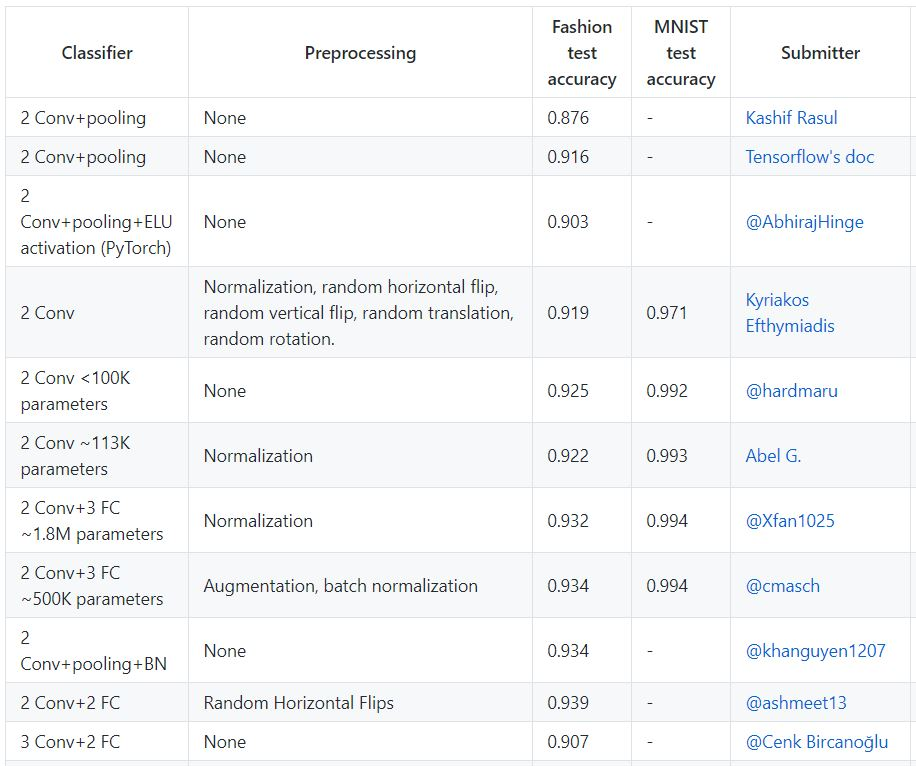

If you want to check more model performance, click the [link](https://github.com/zalandoresearch/fashion-mnist)

# PB file to do the inference

In [20]:
from tensorflow.python.platform import gfile
def model_restore_from_pb(pb_path,node_dict,GPU_ratio=None):
    tf_dict = dict()
    with tf.Graph().as_default():
        config = tf.ConfigProto(log_device_placement=True,
                                allow_soft_placement=True,
                                )
        if GPU_ratio is None:
            config.gpu_options.allow_growth = True  
        else:
            config.gpu_options.per_process_gpu_memory_fraction = GPU_ratio  
        sess = tf.Session(config=config)
        with gfile.FastGFile(pb_path, 'rb') as f:
            graph_def = tf.GraphDef()
            graph_def.ParseFromString(f.read())
            sess.graph.as_default()

            #----issue solution if models with batch norm
            for node in graph_def.node:
                if node.op == 'RefSwitch':
                    node.op = 'Switch'
                    for index in range(len(node.input)):
                        if 'moving_' in node.input[index]:
                            node.input[index] = node.input[index] + '/read'
                elif node.op == 'AssignSub':
                    node.op = 'Sub'
                    if 'use_locking' in node.attr: del node.attr['use_locking']

            tf.import_graph_def(graph_def, name='') 

        sess.run(tf.global_variables_initializer())
        for key,value in node_dict.items():
            node = sess.graph.get_tensor_by_name(value)
            tf_dict[key] = node
        return sess,tf_dict

In [21]:
#----inputs
pb_path = r"D:\code\model_saver\fashion_mnist\pb_model.pb"
node_dict = {'input': 'input:0',
             'keep_prob': 'keep_prob:0',
             #'keep_prob_2': 'keep_prob_2:0',
             'prediction': 'prediction:0'}
GPU_ratio = 0.1
root_dir = r"D:\dataset\fashion_mnist\val"

#----model initialization
sess,tf_dict = model_restore_from_pb(pb_path,node_dict,GPU_ratio=GPU_ratio)
tf_input = tf_dict['input']
tf_keep_prob = tf_dict['keep_prob']
# tf_keep_prob_2 = tf_dict['keep_prob_2']
tf_prediction = tf_dict['prediction']

model_shape = [None,tf_input.shape[1].value,tf_input.shape[2].value,tf_input.shape[3].value]
print("model_shape: ",model_shape)

#----calculate predictions of VALIDATION set
count_o = 0
for idx in range(ites_val):
    num_start = idx * batch_size
    num_end = np.minimum(num_start + batch_size,img_quantity_val)

    batch_dim = [num_end - num_start]
    batch_dim.extend(model_shape[1:])
    batch_data = np.zeros(batch_dim,dtype=np.float32)
    
    batch_paths = paths_val[num_start:num_end]

    for i,path in enumerate(batch_paths):
        img = cv2.imread(path)
        if img is None:
            print("read failed:",path)
        else:
            img = cv2.resize(img,(model_shape[2],model_shape[1]))
            img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
            batch_data[i] = img

    batch_data /= 255
    batch_labels = labels_val[num_start:num_end]

    
    predictions = sess.run(tf_prediction,feed_dict={tf_input:batch_data,tf_keep_prob:1.0})
                                 
    for idx, pred in enumerate(predictions):
        arg = np.argmax(pred)
        if arg == batch_labels[idx]:
            count_o += 1
        else:
            print("Incorrect prediction，path:{}, prediction={}, label={}".format(batch_paths[idx], arg, batch_labels[idx] ))
            
            
print("Accuracy: ",count_o /img_quantity_val)


Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: GeForce RTX 2080 Ti, pci bus id: 0000:01:00.0, compute capability: 7.5

Instructions for updating:
Use tf.gfile.GFile.
model_shape:  [None, 32, 32, 3]
Incorrect prediction，path:D:\dataset\fashion_mnist\val\Ankle_boot\Ankle_boot_1.jpg, prediction=5, label=0
Incorrect prediction，path:D:\dataset\fashion_mnist\val\Ankle_boot\Ankle_boot_139.jpg, prediction=7, label=0
Incorrect prediction，path:D:\dataset\fashion_mnist\val\Ankle_boot\Ankle_boot_149.jpg, prediction=7, label=0
Incorrect prediction，path:D:\dataset\fashion_mnist\val\Ankle_boot\Ankle_boot_160.jpg, prediction=5, label=0
Incorrect prediction，path:D:\dataset\fashion_mnist\val\Ankle_boot\Ankle_boot_182.jpg, prediction=7, label=0
Incorrect prediction，path:D:\dataset\fashion_mnist\val\Ankle_boot\Ankle_boot_183.jpg, prediction=7, label=0
Incorrect prediction，path:D:\dataset\fashion_mnist\val\Ankle_boot\Ankle_boot_233.jpg, prediction=5, label=0
Incorrect pred

Incorrect prediction，path:D:\dataset\fashion_mnist\val\Coat\Coat_637.jpg, prediction=6, label=2
Incorrect prediction，path:D:\dataset\fashion_mnist\val\Coat\Coat_639.jpg, prediction=6, label=2
Incorrect prediction，path:D:\dataset\fashion_mnist\val\Coat\Coat_640.jpg, prediction=4, label=2
Incorrect prediction，path:D:\dataset\fashion_mnist\val\Coat\Coat_646.jpg, prediction=3, label=2
Incorrect prediction，path:D:\dataset\fashion_mnist\val\Coat\Coat_655.jpg, prediction=6, label=2
Incorrect prediction，path:D:\dataset\fashion_mnist\val\Coat\Coat_659.jpg, prediction=6, label=2
Incorrect prediction，path:D:\dataset\fashion_mnist\val\Coat\Coat_660.jpg, prediction=4, label=2
Incorrect prediction，path:D:\dataset\fashion_mnist\val\Coat\Coat_662.jpg, prediction=6, label=2
Incorrect prediction，path:D:\dataset\fashion_mnist\val\Coat\Coat_663.jpg, prediction=3, label=2
Incorrect prediction，path:D:\dataset\fashion_mnist\val\Coat\Coat_668.jpg, prediction=3, label=2
Incorrect prediction，path:D:\dataset\fas

Incorrect prediction，path:D:\dataset\fashion_mnist\val\Pullover\Pullover_208.jpg, prediction=6, label=4
Incorrect prediction，path:D:\dataset\fashion_mnist\val\Pullover\Pullover_209.jpg, prediction=2, label=4
Incorrect prediction，path:D:\dataset\fashion_mnist\val\Pullover\Pullover_214.jpg, prediction=2, label=4
Incorrect prediction，path:D:\dataset\fashion_mnist\val\Pullover\Pullover_216.jpg, prediction=2, label=4
Incorrect prediction，path:D:\dataset\fashion_mnist\val\Pullover\Pullover_219.jpg, prediction=2, label=4
Incorrect prediction，path:D:\dataset\fashion_mnist\val\Pullover\Pullover_221.jpg, prediction=6, label=4
Incorrect prediction，path:D:\dataset\fashion_mnist\val\Pullover\Pullover_225.jpg, prediction=6, label=4
Incorrect prediction，path:D:\dataset\fashion_mnist\val\Pullover\Pullover_226.jpg, prediction=1, label=4
Incorrect prediction，path:D:\dataset\fashion_mnist\val\Pullover\Pullover_23.jpg, prediction=2, label=4
Incorrect prediction，path:D:\dataset\fashion_mnist\val\Pullover\P

Incorrect prediction，path:D:\dataset\fashion_mnist\val\Pullover\Pullover_530.jpg, prediction=2, label=4
Incorrect prediction，path:D:\dataset\fashion_mnist\val\Pullover\Pullover_541.jpg, prediction=2, label=4
Incorrect prediction，path:D:\dataset\fashion_mnist\val\Pullover\Pullover_545.jpg, prediction=6, label=4
Incorrect prediction，path:D:\dataset\fashion_mnist\val\Pullover\Pullover_55.jpg, prediction=6, label=4
Incorrect prediction，path:D:\dataset\fashion_mnist\val\Pullover\Pullover_558.jpg, prediction=6, label=4
Incorrect prediction，path:D:\dataset\fashion_mnist\val\Pullover\Pullover_559.jpg, prediction=6, label=4
Incorrect prediction，path:D:\dataset\fashion_mnist\val\Pullover\Pullover_560.jpg, prediction=2, label=4
Incorrect prediction，path:D:\dataset\fashion_mnist\val\Pullover\Pullover_570.jpg, prediction=2, label=4
Incorrect prediction，path:D:\dataset\fashion_mnist\val\Pullover\Pullover_572.jpg, prediction=6, label=4
Incorrect prediction，path:D:\dataset\fashion_mnist\val\Pullover\P

Incorrect prediction，path:D:\dataset\fashion_mnist\val\Sandal\Sandal_77.jpg, prediction=7, label=5
Incorrect prediction，path:D:\dataset\fashion_mnist\val\Sandal\Sandal_847.jpg, prediction=7, label=5
Incorrect prediction，path:D:\dataset\fashion_mnist\val\Sandal\Sandal_863.jpg, prediction=7, label=5
Incorrect prediction，path:D:\dataset\fashion_mnist\val\Sandal\Sandal_869.jpg, prediction=7, label=5
Incorrect prediction，path:D:\dataset\fashion_mnist\val\Shirt\Shirt_10.jpg, prediction=2, label=6
Incorrect prediction，path:D:\dataset\fashion_mnist\val\Shirt\Shirt_102.jpg, prediction=2, label=6
Incorrect prediction，path:D:\dataset\fashion_mnist\val\Shirt\Shirt_104.jpg, prediction=8, label=6
Incorrect prediction，path:D:\dataset\fashion_mnist\val\Shirt\Shirt_105.jpg, prediction=2, label=6
Incorrect prediction，path:D:\dataset\fashion_mnist\val\Shirt\Shirt_113.jpg, prediction=2, label=6
Incorrect prediction，path:D:\dataset\fashion_mnist\val\Shirt\Shirt_115.jpg, prediction=8, label=6
Incorrect pred

Incorrect prediction，path:D:\dataset\fashion_mnist\val\Sneaker\Sneaker_254.jpg, prediction=0, label=7
Incorrect prediction，path:D:\dataset\fashion_mnist\val\Sneaker\Sneaker_273.jpg, prediction=0, label=7
Incorrect prediction，path:D:\dataset\fashion_mnist\val\Sneaker\Sneaker_284.jpg, prediction=0, label=7
Incorrect prediction，path:D:\dataset\fashion_mnist\val\Sneaker\Sneaker_290.jpg, prediction=0, label=7
Incorrect prediction，path:D:\dataset\fashion_mnist\val\Sneaker\Sneaker_294.jpg, prediction=5, label=7
Incorrect prediction，path:D:\dataset\fashion_mnist\val\Sneaker\Sneaker_474.jpg, prediction=0, label=7
Incorrect prediction，path:D:\dataset\fashion_mnist\val\Sneaker\Sneaker_495.jpg, prediction=0, label=7
Incorrect prediction，path:D:\dataset\fashion_mnist\val\Sneaker\Sneaker_511.jpg, prediction=5, label=7
Incorrect prediction，path:D:\dataset\fashion_mnist\val\Sneaker\Sneaker_515.jpg, prediction=5, label=7
Incorrect prediction，path:D:\dataset\fashion_mnist\val\Sneaker\Sneaker_527.jpg, pr

Incorrect prediction，path:D:\dataset\fashion_mnist\val\T-shirt_top\T-shirt_top_760.jpg, prediction=6, label=8
Incorrect prediction，path:D:\dataset\fashion_mnist\val\T-shirt_top\T-shirt_top_765.jpg, prediction=6, label=8
Incorrect prediction，path:D:\dataset\fashion_mnist\val\T-shirt_top\T-shirt_top_766.jpg, prediction=6, label=8
Incorrect prediction，path:D:\dataset\fashion_mnist\val\T-shirt_top\T-shirt_top_768.jpg, prediction=6, label=8
Incorrect prediction，path:D:\dataset\fashion_mnist\val\T-shirt_top\T-shirt_top_773.jpg, prediction=6, label=8
Incorrect prediction，path:D:\dataset\fashion_mnist\val\T-shirt_top\T-shirt_top_774.jpg, prediction=6, label=8
Incorrect prediction，path:D:\dataset\fashion_mnist\val\T-shirt_top\T-shirt_top_775.jpg, prediction=1, label=8
Incorrect prediction，path:D:\dataset\fashion_mnist\val\T-shirt_top\T-shirt_top_784.jpg, prediction=3, label=8
Incorrect prediction，path:D:\dataset\fashion_mnist\val\T-shirt_top\T-shirt_top_785.jpg, prediction=6, label=8
Incorrect 